In [214]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dataset = pd.read_csv('data/bank-customers-for-analysis.csv')
dataset.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,deposit,credit_history,credit_score,psychographic,income_bracket,cc_with_points
10667,51,retired,single,tertiary,no,730,yes,no,unknown,18,...,2,-1,0,unknown,no,11,116,0,<40K,False


In [215]:
dataset['job'].replace(['admin.', 'entrepreneur', 'management', 'services', 'technician'], 0, inplace=True)
dataset['job'].replace(['blue-collar', 'housemaid', 'self-employed'], 1, inplace=True)
dataset['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 2, inplace=True)
dataset['education'].replace({'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}, inplace=True)
dataset['marital'].replace({'single': 0, 'married': 1, 'divorced': 2}, inplace=True)
dataset['default'].replace({'no': 0, 'yes': 1}, inplace=True)
dataset['housing'].replace({'no': 0, 'yes': 1}, inplace=True)
dataset['loan'].replace({'no': 0, 'yes': 1}, inplace=True)
dataset['income_bracket'].replace({'<40K': 0, '40K-60K': 1, '60K-100K': 2, '100K+': 3}, inplace=True)

dataset.drop(columns=['contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit', 'credit_history'], axis=1, inplace=True)

dataset.sample()

/tmp/ipykernel_24686/1549360168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['job'].replace(['admin.', 'entrepreneur', 'management', 'services', 'technician'], 0, inplace=True)
/tmp/ipykernel_24686/1549360168.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['job'].replace([

,age,job,marital,education,default,balance,housing,loan,duration,credit_score,psychographic,income_bracket,cc_with_points
4681,27,2,0,2,0,3733,1,0,299,615,1,2,True


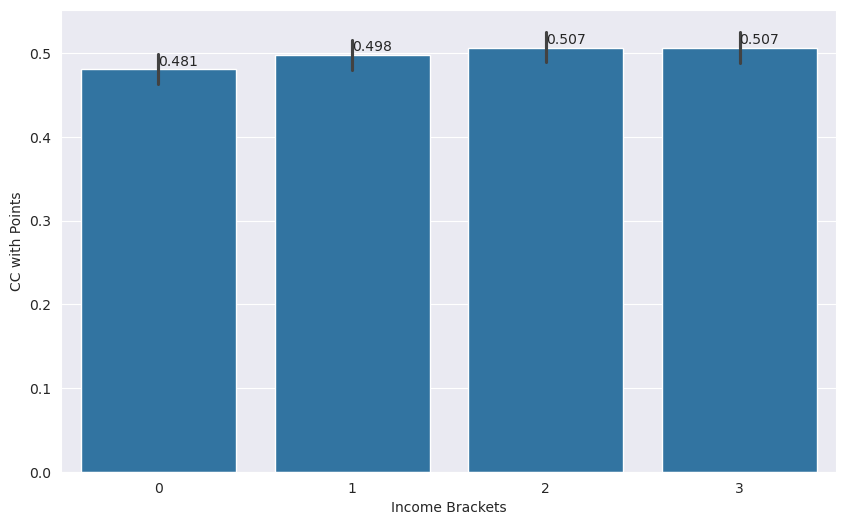

In [216]:
fig, ax = plt.subplots(figsize=(10, 6))
bp = sns.barplot(data=dataset, x='income_bracket', y='cc_with_points', ax=ax)

plt.ylabel('CC with Points')
plt.xlabel('Income Brackets')

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2, g.get_height() + 0.005))

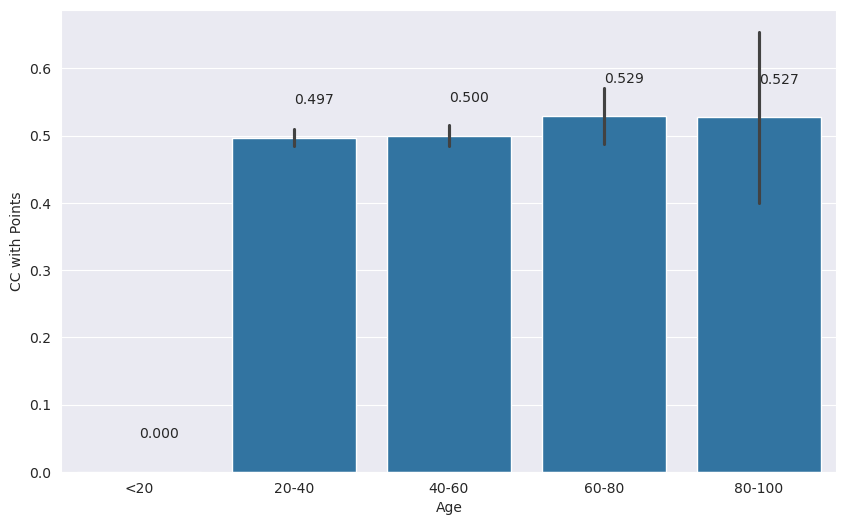

In [217]:
fig, ax = plt.subplots(figsize=(10, 6))
age_bins = [0, 20, 40, 60, 80, 100]
dataset['age'] = pd.cut(dataset['age'], bins=age_bins, labels=['<20', '20-40', '40-60', '60-80', '80-100'])
bp = sns.barplot(data=dataset, x='age', y='cc_with_points', ax=ax)

plt.ylabel('CC with Points')
plt.xlabel('Age')

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2, g.get_height() + 0.05))

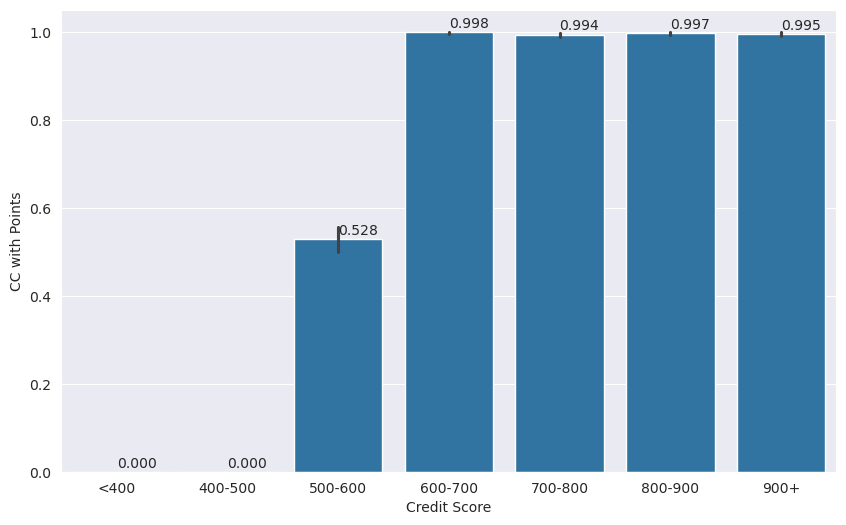

In [218]:
fig, ax = plt.subplots(figsize=(10, 6))
credit_bins = [0, 400, 500, 600, 700, 800, 900, 1000]
dataset['credit_score'] = pd.cut(dataset['credit_score'], bins=credit_bins, labels=['<400', '400-500', '500-600', '600-700', '700-800', '800-900', '900+'])
bp = sns.barplot(data=dataset, x='credit_score', y='cc_with_points', ax=ax)

plt.ylabel('CC with Points')
plt.xlabel('Credit Score')

for g in bp.patches:
    bp.annotate(format(g.get_height(), '.3f'), (g.get_x() + g.get_width() / 2, g.get_height() + 0.01))

In [219]:
X, y = dataset.drop('cc_with_points', axis=1), dataset['cc_with_points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=60)

dataset['age']

0        40-60
1        40-60
2        40-60
3        40-60
4        40-60
         ...  
11157    20-40
11158    20-40
11159    20-40
11160    40-60
11161    20-40
Name: age, Length: 11162, dtype: category
Categories (5, object): ['<20' < '20-40' < '40-60' < '60-80' < '80-100']

In [220]:
dataset

,age,job,marital,education,default,balance,housing,loan,duration,credit_score,psychographic,income_bracket,cc_with_points
0,40-60,0,1,1,0,2343,1,0,1042,<400,2,3,False
1,40-60,0,1,1,0,45,0,0,1467,400-500,2,3,False
2,40-60,0,1,1,0,1270,1,0,1389,900+,2,2,True
3,40-60,0,1,1,0,2476,1,0,579,700-800,1,0,True
4,40-60,0,1,2,0,184,0,0,673,<400,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,20-40,1,0,0,0,1,1,0,257,800-900,0,0,True
11158,20-40,0,1,1,0,733,0,0,83,700-800,1,1,True
11159,20-40,0,0,1,0,29,0,0,156,500-600,2,1,True
11160,40-60,0,1,1,0,0,0,1,9,<400,0,0,False


In [221]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# predictions = dtree.predict(X_test)
# 
# classification_report(y_test, predictions)

ValueError: could not convert string to float: '20-40'